# Numerical Optimixation: General Review

*30th September 2024*

Joel Dieguez and Clàudia Valverde


This laboratory focuses on unconstrained optimization of a function $f(x)$ and, in particular, on the gradient descent and Newton algorithms.

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Gradient descent methods
This part focuses on understanding the principles of a gradient descent algorithm. We expect to be
able to answer questions such as: why does this method work? Why/in which cases is this a good
method?

### 1.1) A simple quadratic function
We begin with a simple two-dimensional function, namely
$$
f(x) = x^2_1 + x^2_2
$$
where , $x \in R^2, x = (x_1, x_2)^T$(vectors are expressed as columns)  It is easy to minimize this
function numerically because it is a convex function. Convex functions have a single minimum.

How to minimize a function f(x) numerically? Let us begin with the previous function. Take the example source code you have included within this document and run it. The code performs a contour plot of $f(x) = x^2_1 + x^2_2$ and draws the gradient of the function. Observe the direction of the arrows associated to the gradient.  The gradient of a function, $\nabla f$, points towards the direction in which the function increases with the highest possible slope. In other words, we follow the gradient direction in order to increase the value of the function at its highest rate.

By contrast, if we wish to find the minimum, it is convenient to follow the gradient in the opposite direction. The resulting algorithm is therefore called gradient descent. Given an initial
guess $x^0$, we may try to find the minimum by performing a gradient descent

$$
x^{k+1} = x^{k} - α^k\nabla f(x^k)
$$

where k is the iteration. The latter equation defines an iterative algorithm that successively approaches the minimum. The value $x^{k+1}$ is computed from $x^k$ and we would like $x^{k+1}$ to be
“nearer” to the minimum than $x^k$. The value $α^k$ is the step. For the moment we will just assume that the step is constant.

The gradient descent with a constant step is a simple algorithm and it works well for simple functions like the one previously introduced. A constant step also is sometimes used with complex functions in the absence of a better solution. In this practical we will see some procedures that can be used to minimize a function. Indeed,



1.   The step $α^k$ plays an important role (from a mathematical point of view) since we would like to approach the minimum fast. There are many research works that focus on computing a good value for $α^k$ per iteration. We will see the basic principles of these algorithms in section 1.2.
2.  Taking the opposite of the gradient is not the best descent direction one may take. There are other directions, such as the one given by the Newton direction, which may work better. We will see the latter issue in section 2.

We begin some experiments with gradient descent using a constant step
$$
x^{k+1} = x^k − α^k \nabla f(x^k)
$$
Perform the next experiments:



#### 1.1.1) Please, implement the previous algorithm with a constant $α^k = 0.1$ parameter. Take an initial point $x^0$ and perform at most $100$ iterations. Try different starting points $x^0$. Observe that the algorithm always converges (up to a certain precision) to the only minimum this function has. Observe that the more the iterations, the closer to the minimum. Please, draw the path the gradient descent follows for each of the starting points $x^0$ you have studied.

In [244]:
# defining the simple two-dimentional function
def f(x1,x2):
    return x1**2 + x2**2

# defining the gradient of the two-dimentional function
def grad_f(x1,x2):
    return np.array([2*x1, 2*x2])

In [245]:
# Defining initial conditions
alpha = 0.1 # fixed step
x0 = np.random.rand(2) * 100 # random initial position

print("x0 = ", x0)

x0 =  [57.75242148 67.46032473]


In [246]:
# Simple Gradient Descent function
def SGD(alpha, x0, k, verbose=False):
    x = [x0]
    if verbose: print("x0 = ", x[-1])

    for i in range(1, k+1):
        x.append(x[-1] - alpha * grad_f(x[-1][0], x[-1][1]))
        if verbose: print(f"x{i} = {x[-1]}")

    return x

x = SGD(alpha, x0, 100, verbose=False)

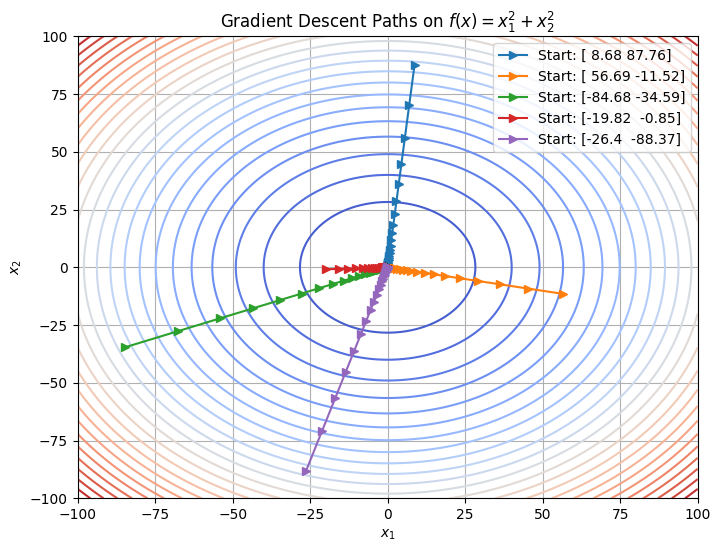

In [247]:
# Plotting
x1_vals = np.linspace(-100, 100, 400)
x2_vals = np.linspace(-100, 100, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=30, cmap='coolwarm')
plt.title('Gradient Descent Paths on $f(x) = x_1^2 + x_2^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for point in range(5):#starting_points:
    starting_point = np.random.uniform(low=-100, high=100, size = (2,))
    path = SGD(alpha=0.1, x0=starting_point, k=100)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {starting_point.round(2)}')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comment on the plot:**
We can see that the algorithm is converging to the minimum for all the 5 different starting points.

#### 1.1.2) You may try other values of $\alpha$ such as $\alpha^k = 1$ and $\alpha^k = 2$. In this case the gradient descent performs poorly due to the too bigger steps. This shows you the importance of selecting an appropriate value for the step $\alpha$. There are many research works that have focused on this issue, but it is not the purpose of this lab to see how they work. Rather, we just will see some of their principles.

[array([-2.67124712, -1.85471549]), array([-2.1369977 , -1.48377239]), array([-1.70959816, -1.18701792]), array([-1.36767853, -0.94961433]), array([-1.09414282, -0.75969147]), array([-0.87531426, -0.60775317]), array([-0.70025141, -0.48620254]), array([-0.56020112, -0.38896203]), array([-0.4481609 , -0.31116962]), array([-0.35852872, -0.2489357 ]), array([-0.28682298, -0.19914856]), array([-0.22945838, -0.15931885]), array([-0.1835667 , -0.12745508]), array([-0.14685336, -0.10196406]), array([-0.11748269, -0.08157125]), array([-0.09398615, -0.065257  ]), array([-0.07518892, -0.0522056 ]), array([-0.06015114, -0.04176448]), array([-0.04812091, -0.03341158]), array([-0.03849673, -0.02672927]), array([-0.03079738, -0.02138341]), array([-0.02463791, -0.01710673]), array([-0.01971032, -0.01368538]), array([-0.01576826, -0.01094831]), array([-0.01261461, -0.00875865]), array([-0.01009169, -0.00700692]), array([-0.00807335, -0.00560553]), array([-0.00645868, -0.00448443]), array([-0.00516694,

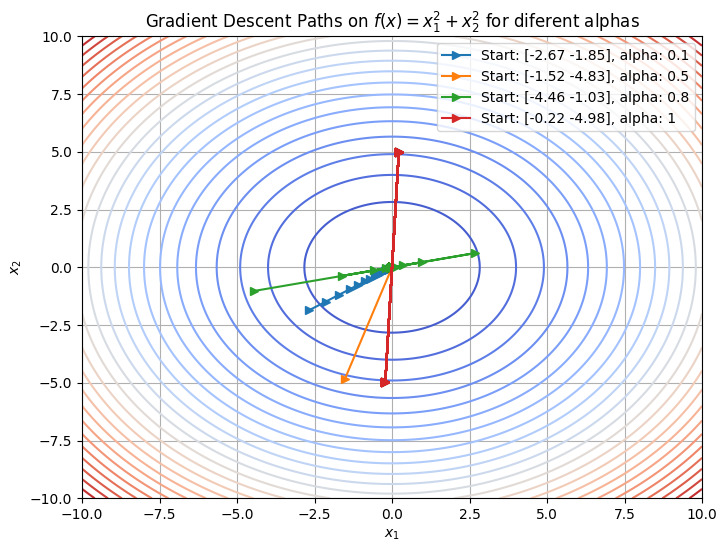

In [248]:
alphas = [0.1, 0.5, 0.8, 1] # declaring different alphas to try

# Plotting
x1_vals = np.linspace(-10, 10, 400)
x2_vals = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=30, cmap='coolwarm')
plt.title('Gradient Descent Paths on $f(x) = x_1^2 + x_2^2$ for diferent alphas')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for alpha in alphas:
    starting_point = np.random.uniform(low=-5, high=5, size = (2,))
    path = SGD(alpha=alpha, x0=starting_point, k=100)
    print(path)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {starting_point.round(2)}, alpha: {alpha}')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments on the plot:**

As we increase $\alpha$ the steps are bigger and they can pass the minimum wihtout ever arriving (observe red path). For $\alpha$ smaller than 1 they converge correctly. For the case of $\alpha=1$ the step is large enough that after each iteration, the point jumps over the minimum, making it hard to sattle down near the true solution.

[array([-0.29251062,  0.48538522]), array([ 0.87753186, -1.45615565]), array([-2.63259557,  4.36846695]), array([  7.8977867 , -13.10540084]), array([-23.69336011,  39.31620253]), array([  71.08008033, -117.94860758])]


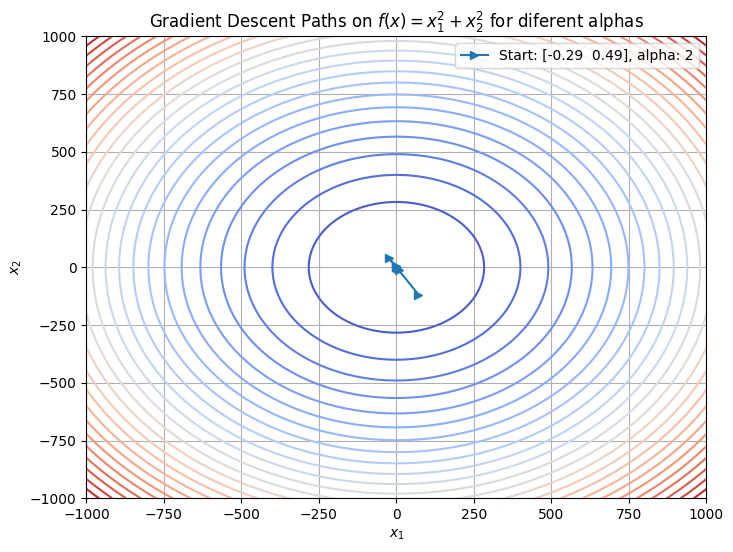

In [249]:
# trying with alpha=2
alphas = [2]

# Plotting
x1_vals = np.linspace(-1000, 1000, 400)
x2_vals = np.linspace(-1000, 1000, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=30, cmap='coolwarm')
plt.title('Gradient Descent Paths on $f(x) = x_1^2 + x_2^2$ for diferent alphas')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for alpha in alphas:
    starting_point = np.random.uniform(low=-1, high=1, size = (2,))
    path = SGD(alpha=alpha, x0=starting_point, k=5)
    print(path)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {starting_point.round(2)}, alpha: {alpha}')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments on the plot:**

For $\alpha = 2$ we have had to plot it apart as we alredy knew it did not converge for the previous conditions. We have had to change num of iterations (k), as otherwise the path does not fit the graphic as it diverges super fast.

### 1.2 A function with multiple minima

Consider noe the following function:

$$
f(x_1, x_2) = x^2_1(4 − 2.1 x^2_1 + \frac{1}{3}x^4_1) + x_1x_2 + x^2_2(−4 + 4x^2_2)
$$


Plot a contour plot of the previous function within the range $x_1 \in [−2, 2]$ and $x_2 \in [−1, 1]$. This function is fundamentally more complex than the previous because it is not a convex function, which has several local minima. Which minima will be found? Can you guess it? It will depend, in fact, on the initial value $x^0$ you may assign. Perform the next tests:

In [255]:
# declaring the function
def f(X1, X2):
  return X1**2 * (4 - 2.1 * X1**2 + (1/3) * X1**4) + X1 * X2 + X2**2 * (-4 + 4 * X2**2)

# declaring its gradient
def grad_f(X1,X2):
  return np.array([2*X1**5 - 8.4*X1**3 + 8*X1 + X2, X1+16*X2**3-8*X2])

In [256]:
# Create a grid of x1 and x2 values
x1 = np.arange(-2, 2, 0.002)
x2 = np.arange(-1, 1, 0.001)
X1, X2 = np.meshgrid(x1, x2)

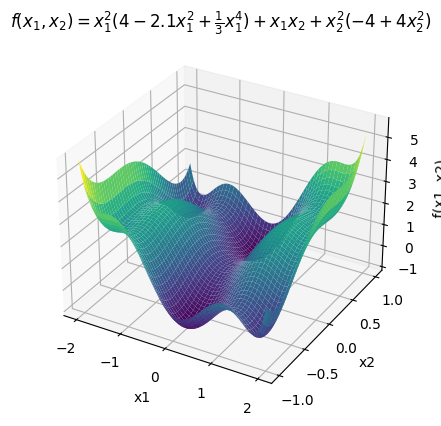

In [257]:
Z = f(X1, X2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Z, cmap='viridis')

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

# Set title
ax.set_title(r'$f(x_1, x_2) = x^2_1(4 − 2.1 x^2_1 + \frac{1}{3}x^4_1) + x_1x_2 + x^2_2(−4 + 4x^2_2)$')

plt.show()

Text(0, 0.5, '$x_2$')

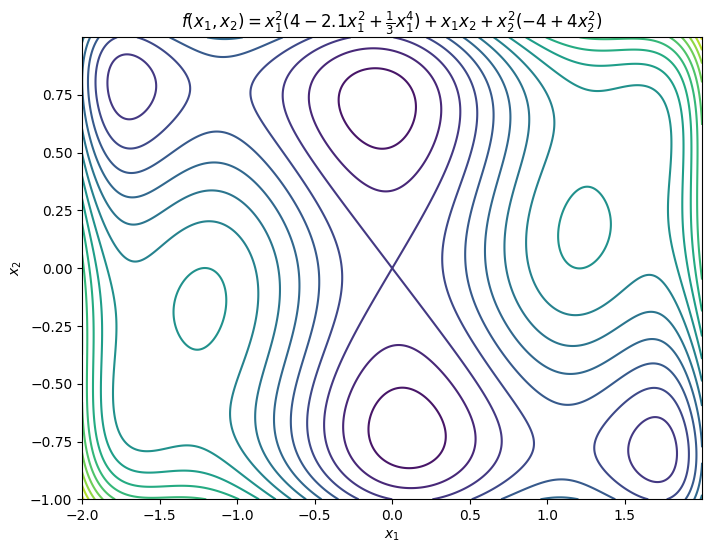

In [258]:
# Create the plot
plt.figure(figsize=(8, 6))

# Contour plot
plt.contour(X1, X2, f(X1, X2), levels=20, cmap='viridis')

plt.title(r'$f(x_1, x_2) = x^2_1(4 − 2.1 x^2_1 + \frac{1}{3}x^4_1) + x_1x_2 + x^2_2(−4 + 4x^2_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


**Comments on the plots:**

Looking at the function and contour plot we can already see that it has several local minimums.

#### 1.2.1) Assume that we follow the simple gradient descent with 100 iterations $$
x^{k+1} = x^k − α^k \nabla f(x^k)
$$

Using the plot found at step 1, try to start at different starting points $x^0$ using $\alpha^k = 0.1$ (within in range $x_1 \in [−2, 2]$ and $x_2 \in [−1, 1]$). Draw the path the minimization algorithm follows and observe to which minimum the algorithm converges. You should see that, for a given starting point $x^0$, the algorithm usually converges to the minimum located in the valley to which $x^0$ belongs.

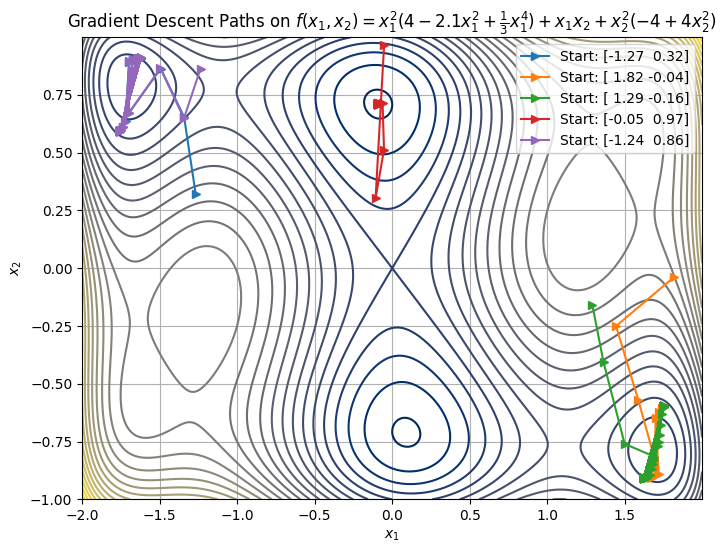

In [259]:
# exaple of the Gradient descent paths of 5 random starting points
plt.figure(figsize=(8, 6))
plt.contour(X1, X2,  f(X1, X2), levels=30, cmap='cividis')
plt.title(r'Gradient Descent Paths on $f(x_1, x_2) = x^2_1(4 − 2.1 x^2_1 + \frac{1}{3}x^4_1) + x_1x_2 + x^2_2(−4 + 4x^2_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for point in range(5):
    x0_1 = np.random.uniform(low=-2, high=2, size = (1,))
    x0_2 = np.random.uniform(low=-1, high=1, size = (1,))
    point = np.array([x0_1[0], x0_2[0]])
    path = SGD(alpha=0.1, x0=point, k=100)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {point.round(2)}')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments on the plot:**

Now we can observe that each point is converging to the local minimum closer to its starting point (always in proportion to the num of iterations and the learning rate α)

#### 1.2.2) Let us perform an improvement to the previous algorithm. Indeed, until now we have considered a constant value for $\alpha^k$. Let us consider adapting the value of $\alpha^k$ at each iteration.

There are many algorithms that try to compute a good value of $α^k$. In general you are recommended to use algorithms that implements, for instance, the Armijo rule (the definition of the rule will be given in the lectures). The advantage of the latter algorithms is that they find much better values for $α^k$ than the simple backtracking algorithm you are going to implement next.

The backtracking algorithm works quite well in many cases. Assume that $x^k$ and $\nabla f(x^k)$ have been computed. In order to compute $x^{k+1}$ we start (at each iteration $k$) with $α^k = 1$
and perform the next inner loop iterations, see Figure 1.

##### a) Check if $f(x^k − α^k \nabla f(x^k)) < f(x^k)$. This condition checks if the proposed value of $α^k$ reduces the value of $f(x^k)$.

In [260]:
# SGD backtracking
def SGD_b(alpha_inicial, x0, k, verbose=False, verbose_last=False, abs_cond=1e-3, norm_cond=1e-5):
    x = [x0]
    if verbose: print("x0 = ", x[-1])

    for i in range(1, k+1):
        alpha = alpha_inicial
        fx = f(x[-1][0], x[-1][1])
        x_new =  x[-1] - alpha * grad_f(x[-1][0], x[-1][1])
        while(f(x_new[0], x_new[1]) >= fx):
            alpha *= 0.5
            x_new =  x[-1] - alpha * grad_f(x[-1][0], x[-1][1])

        x.append(x_new)
        if verbose: print(f"x{i} = {x[-1]}")

        # Stopping criterion
        if abs(fx - f(x_new[0], x_new[1])) < abs_cond or np.linalg.norm(grad_f(x_new[0], x_new[1])) < norm_cond:
            if verbose or verbose_last: print("Stopping criterion met")
            if verbose_last: print(f"x{i} = {x[-1]}")
            return x

    if verbose_last: print(f"x{i} = {x[-1]}")
    return x

In [261]:
# checking the function works correctly
x0_1 = np.random.uniform(low=-2, high=2, size = (1,))
x0_2 = np.random.uniform(low=-1, high=1, size = (1,))
point = np.array([x0_1[0], x0_2[0]])
SGD_b(1, point, 100, verbose=True)

x0 =  [ 1.23055816 -0.95526493]
x1 = [ 1.30055651 -0.63809834]
x2 = [ 1.45935512 -0.91913789]
x3 = [ 1.59143209 -0.69341555]
x4 = [ 1.67909368 -0.80617621]
x5 = [ 1.70692265 -0.79025756]
x6 = [ 1.70256266 -0.79854762]
Stopping criterion met


[array([ 1.23055816, -0.95526493]),
 array([ 1.30055651, -0.63809834]),
 array([ 1.45935512, -0.91913789]),
 array([ 1.59143209, -0.69341555]),
 array([ 1.67909368, -0.80617621]),
 array([ 1.70692265, -0.79025756]),
 array([ 1.70256266, -0.79854762])]

##### b) If (a) is not satisfied, update $\alpha^k = \alpha^k/2$, for instance. That is, the step is divided by 2. Go to step (a) and check again.

If (a) is satisfied, perform the update $x^{k+1} = x^k − α^k \nabla f(x^k)$ and start again the algorithm
by computing $ \nabla f(x^k+1)$ with $\alpha^{k+1} = 1$.

There are several convergence criteria that may be used to check the algorithm has found
the minimum. For instance, if $|(x^k+1) − f(x^k)|$ or $\nabla f(x^k+1)$ is below a certain threshold
(or if $ \alpha^k$ reduces below a certain threshold), you may conclude that the gradient descent has
converged. You have found the minimum (up to a certain precision)!

The previous algorithm shows the principles of the backtracking algorithm: the idea is to
compute $\alpha^k$ by progressively reducing its value until you ensure that the value of f is reduced. You may find several improvements to the algorithm, although this is not the purpose of the practical.

Implement the previous algorithm. Rather than using 100 iterations, perform the necessary
number of iterations k until you find an optimal iteration k for which the convergence criterion
is satisfied, e.g. $\nabla f(x^k+1) < 10^{−5}$ (or $||f(x^k+1) − f(x^k)|| < 10^{−3}$). How does the algorithm perform as compared with the constant step results? How many iterations are needed to reach the minimum? 100? Or may be less? There is no single right answer to this question. Just experiment a little bit!

Stopping criterion met
x8 = [-1.70307892  0.79829945]
Stopping criterion met
x6 = [-0.08952345  0.71489315]
Stopping criterion met
x4 = [-0.08928294  0.71643846]
Stopping criterion met
x6 = [-0.0909168   0.71271784]
Stopping criterion met
x9 = [ 0.08898074 -0.71643132]


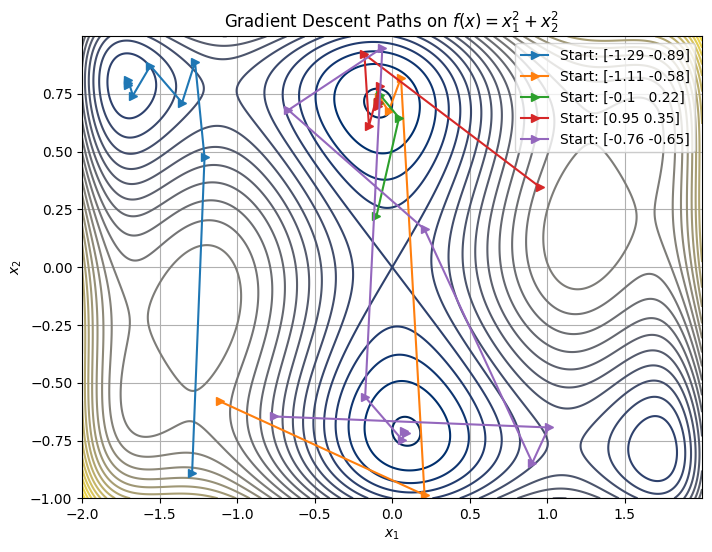

In [262]:
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=30, cmap='cividis')
plt.title('Gradient Descent Paths on $f(x) = x_1^2 + x_2^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot paths for each starting point
for point in range(5):#starting_points:
    x0_1 = np.random.uniform(low=-2, high=2, size = (1,))
    x0_2 = np.random.uniform(low=-1, high=1, size = (1,))
    point = np.array([x0_1[0], x0_2[0]])
    path = SGD_b(1, point, 100, verbose_last=True)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {point.round(2)}')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comment on the plot:**

Looking at the plot of the experiment it is clearly seen that this method is much more efficient, taking less than 10 iterations to find the minimum for the different starting points.

The algorithm almost always converges to one of the local minima at the horizontal center, which are global minima of this function.

### 1.3 The Rosenbrock function

We have seen the basics of the gradient descent

$$
x^{k+1} = x^k − α^k \nabla f(x^k)
$$

Intuitively we follow the direction of the highest descent. Is this the best direction we may take? The answer is no. Gradient descent works well if the variables of the function are well scaled. Otherwise, it may perform poorly. See the example next. Let us consider the Rosenbrock function, see figure 2. The function is defined as
$$
f(x_1, x_2) = (a − x_1)^2 + b (x_2 − x^2_1)^2
$$

The function has a global minimum at $(x^∗_1, x^∗_2) = (a, a^2)$, where $f(x^∗_1, x^∗_2) = 0$. The global minimum is inside a long, very narrow, parabolic shaped valley. The convergence to the global minimum is difficult. There are no local minimums.

You are asked to perform the next experiments:

In [265]:
# define the function and its gradient and plot it and its gradient information

def f(x1, x2, a=1, b=100):
  return (a - x1)**2 + b *(x2 - x1**2)**2

def grad_f(x1, x2, a=1, b=100):
  return np.array([-2*a + 2*x1 -4*b*x1*x2 +4*b*x1**3, 2*b*(x2 - x1**2)])

#### 1.3.1) Plot the contours of the Rosenbrock function for $a = 1$ and $b = 100$. The minimum of the function is thus at $(x^∗_1, x^∗_2) = (1, 1)$. You may also draw the gradient information.

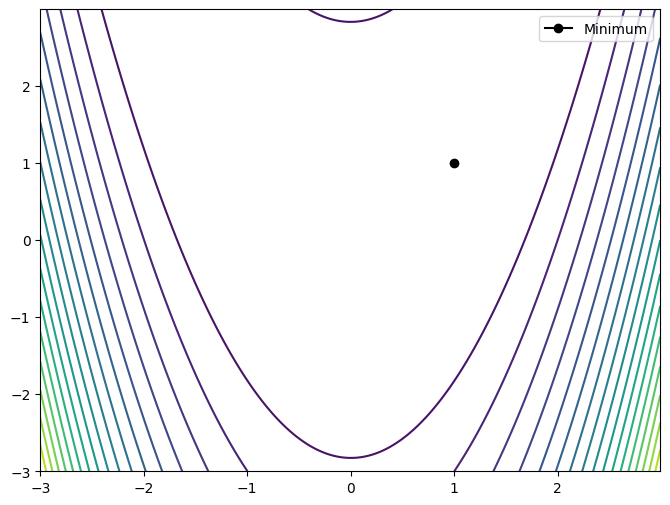

In [266]:
a = 1
b = 100

# Create a grid of x1 and x2 values
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# Create the plot
plt.figure(figsize=(8, 6))

# Contour plot
plt.contour(X1, X2, f(X1, X2, a=1, b=100), levels=20, cmap='viridis')
plt.plot(1,1, color='black', marker='o', label='Minimum')
plt.legend()

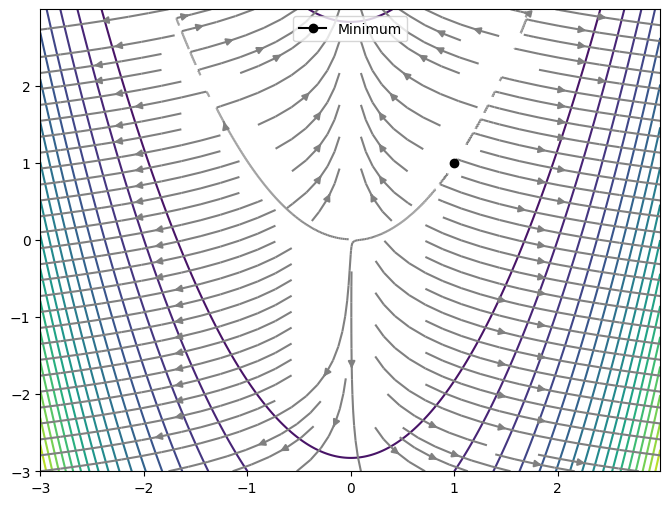

In [267]:
# Plot with the gradient information

# Create the plot
plt.figure(figsize=(8, 6))

# Contour plot
plt.contour(X1, X2, f(X1, X2, a=1, b=100), levels=20, cmap='viridis')

grad_x, grad_y = grad_f(X1, X2, a=1, b=100)
plt.streamplot(X1, X2, grad_x, grad_y, color='gray')
plt.plot(1,1, color='black', marker='o', label='Minimum')
plt.legend()

**Comments on the plot:**

There is only one global minimum of the function, located in (1, 1). However it is located in a long, very narrow, parabolic shaped valley with very minimal changed in the gradient. Overall, it looks like all this valley is a line of minimuns however, there is only one.

#### 1.3.2) Try different starting points $x^0$ in order to check the robustness of the backtracking descent algorithm you have implemented. Draw the path the gradient descent follows in order see how good your algorithm performs. You may stop the algorithm as soon as the stopping criterion is satisfied, e.g. $||\nabla f(x^{k+1})|| < 10^{−5}$(or $|f(x^k{+1}) − f(x^k)| < 10^{−3})$. Do not limit the iterations to 100. How many iterations are performed until the stopping criterion is satisfied?

The fact that the stopping criterion is satisfied does not necessary imply that the minimum has been reached. Once the stopping criterion is satisfied, just check the values of $x_1$ and $x_2$ the algorithm has been able to find. Is the algorithm able to reach the minimum? Recall that we know the minimum which is $(x^∗_1, x^∗_2) = (1, 1)$. If the stopping criterion is not able to find the minimum, modify the criterion (by putting lower thresholds, for instance) to see if it is able to find the minimum.

Just test if you are able to find the minimum!

Stopping criterion met
x12 = [1.92251295 3.69945292]
Stopping criterion met
x13 = [1.267868   1.60948463]
Stopping criterion met
x14 = [1.19432192 1.42803344]
Stopping criterion met
x14 = [0.56294832 0.31996153]
Stopping criterion met
x9 = [-1.69772066  2.8832154 ]


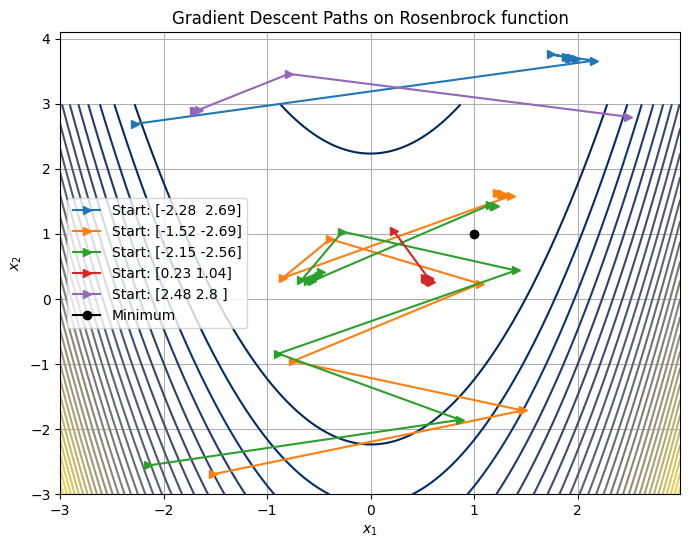

In [269]:
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2), levels=30, cmap='cividis')
plt.title('Gradient Descent Paths on Rosenbrock function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for point in range(5):#starting_points:
    point = np.random.uniform(low=-3, high=3, size = (2,))
    path = SGD_b(1, point, 100, verbose_last=True)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {point.round(2)}')

plt.plot(1,1, color='black', marker='o', label='Minimum')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments on the plot:**  

None of them are the correct value, they reach the stopping criterion but not the minimum, which is in (1,1).

This is due to the fact that the changed of gradient in the valley where the minimum is located are very minimal and the stopping conditions are met before reaching the minimum.

x1000 = [1.06961538 1.14476599]
x1000 = [0.98294127 0.96618433]
Stopping criterion met
x208 = [1.00236447 1.00475773]
x1000 = [0.92269561 0.85059305]
x1000 = [0.9378194  0.87905804]


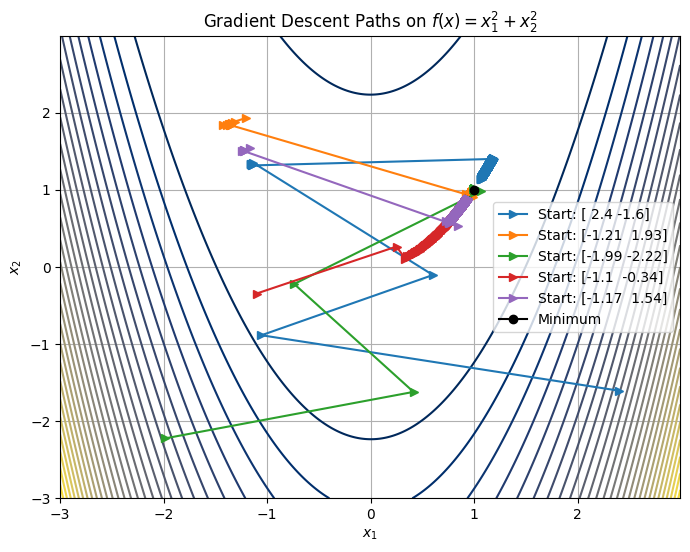

In [270]:
abs_cond=1e-9
norm_cond=1e-7
k = 1000 # New limit

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2), levels=30, cmap='cividis')
plt.title('Gradient Descent Paths on $f(x) = x_1^2 + x_2^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for point in range(5):#starting_points:
    point = np.random.uniform(low=-3, high=3, size = (2,))
    path = SGD_b(1, point, k=k, verbose_last=True, abs_cond=abs_cond, norm_cond=norm_cond)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {point.round(2)}')

plt.plot(1,1, color='black', marker='o', label='Minimum')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments:**
Relaxing the stopping conditions a bit, we still see that it is stopping before reaching the minimum, we need to relax them more.

x10000 = [0.99997208 0.99994414]
x10000 = [0.99996096 0.99992168]
x10000 = [1.00002494 1.00005005]
x10000 = [1.00001834 1.00003682]
x10000 = [1.0001718  1.00034491]


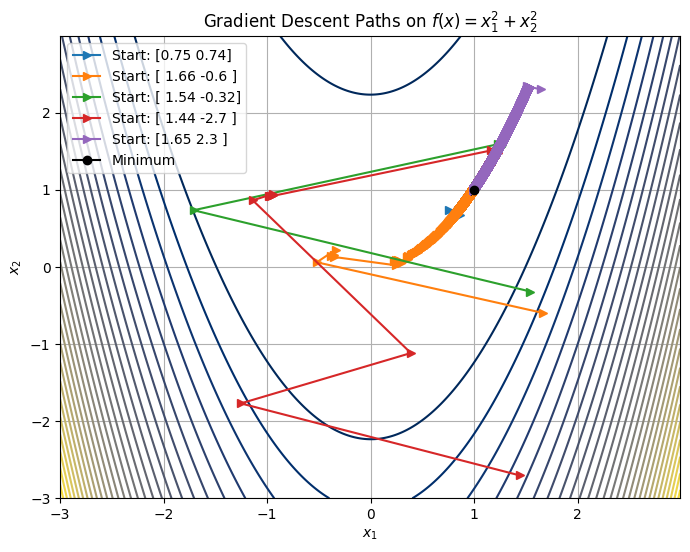

In [271]:
abs_cond=1e-16
norm_cond=1e-16
k = 10000 # New limit

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2), levels=30, cmap='cividis')
plt.title('Gradient Descent Paths on $f(x) = x_1^2 + x_2^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for point in range(5):#starting_points:
    point = np.random.uniform(low=-3, high=3, size = (2,))
    path = SGD_b(1, point, k=k, verbose_last=True, abs_cond=abs_cond, norm_cond=norm_cond)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {point.round(2)}')

plt.plot(1,1, color='black', marker='o', label='Minimum')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments:**

If we do a very loose stopping criterion (1e-16) and 10000 limit of iterations, it is able to reach the minimum but it is not efficient at all. Now, it reaches the minimum zone but it is stuck there for thousands of iterations without reaching the minimum, the method is very slow.

## 2. Newton Descent Method

We have seen that the computation of the step $\alpha^k$ is critical for a good performance of the gradient descent. The question that arises now is: can we use other search directions that may improve the performance of the descent? The answer is yes! What other search directions may we take? One
well known search direction is the Newton direction.

### 2.1 A simple quadratic function

We begin by focusing on a simple two-dimensional quadratic function. Concretely,
$$f(x) = 100 x^2_1+ x^2_2$$
where , $x \in R^2, x = (x_1, x_2)^T$ (vectors are expressed column-wise). Observe that the function is convex and, thus, it has one unique stationary point which corresponds to the minimum. You are
proposed to follow the next steps:

In [277]:
def f(x1, x2):
  return 100*x1**2 + x2**2

def grad_f(x1, x2):
  return np.array([200*x1, 2*x2])

def hessian_f(x1, x2):
  return np.array([[200, 0], [0, 2]])

#### 2.1.1) We are first going to minimize the previous function using the gradient descent algorithm. That is, $x^{k+1} = x^k − α^k \nabla
(x^k)$
Given an initial guess $x^0$, count the number of steps that are needed in order to reach the
minimum so that $||\nabla f(x^{k+1})|| < 10^{−5}$(or $|f(x^k{+1}) − f(x^k)| < 10^{−3})$. The value of $\alpha^k$ can be computed using the backtracking algorithm you implemented in section 1.2.

Text(0.5, 0, 'f(x1, x2)')

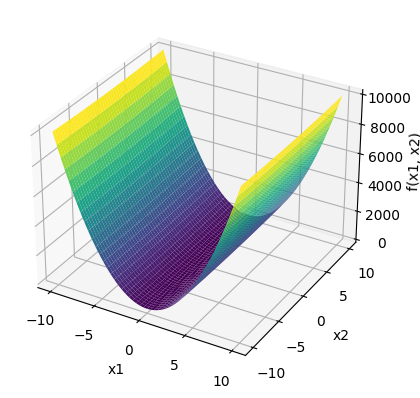

In [278]:
# Create a grid of x1 and x2 values
x1 = np.arange(-10, 10, 0.01)
x2 = np.arange(-10, 10, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, f(X1, X2), cmap='viridis')

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

**Comments:**

This functions looks like it has a long line of minimum points along $x_1 = 0$. However they are not minimums, only the point (0, 0). This is due to the fact that the $x_1$ coordinate is multiplied by 100, so its values affect much more the result of the funciton. This can lead to some issues in the optimization algorithm.

Stopping criterion met
x20 = [-0.1031927   3.55781704]
Stopping criterion met
x28 = [ 0.00991167 -0.36033305]
Stopping criterion met
x121 = [0.00742354 0.27334199]
Stopping criterion met
x158 = [-0.0070491   0.25880203]
Stopping criterion met
x39 = [ 0.01712042 -0.60168723]


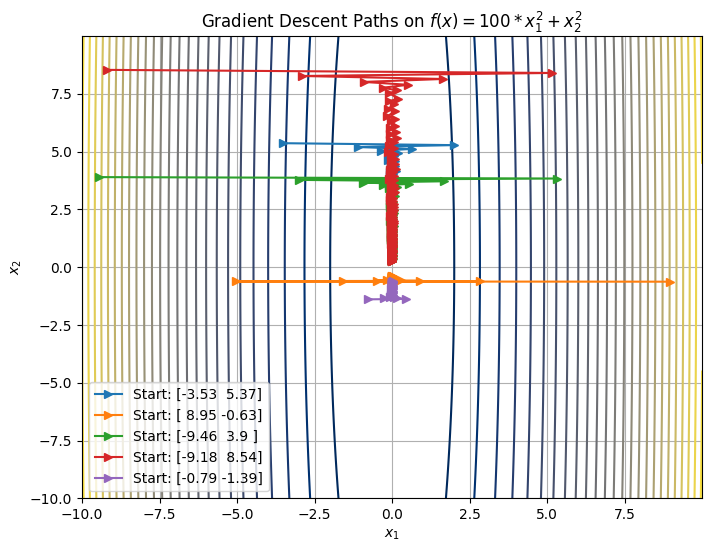

In [279]:
# Default stopping conditions

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2), levels=30, cmap='cividis')
plt.title('Gradient Descent Paths on $f(x) = 100*x_1^2 + x_2^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for point in range(5):#starting_points:
    point = np.random.uniform(low=-10, high=10, size = (2,))
    path = SGD_b(1, point, k=k, verbose_last=True)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {point.round(2)}')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments:**

All the iterations converge to the x1 = 0 but not the global minimum. The algorithm clearly sees the difference along the x1 values, but struggles managing the x2 values, as its difference is much more subtle.

#### 2.1.2) In a general case, an unconstrained minimization algorithm uses the next algorithm
$$
x^{k+1} = x^k + \alpha^kd^k
$$

where $d^k$ is a descent direction (also called search direction). A well known search direction
is the Newton direction. The descent direction $d^k$ is obtained from the second order Taylor
expansion of $f(x^k)$,which is


$$
∇^2f(x^k) d^k = -∇f(x^k) ⇒ d^k = - (∇^2f(x^k))^{-1} * ∇f(x^k)
$$

In other words, we perform a quadratic approximation of $f(x^k)$. The minimum of the quadratic expression is obtained for $ \nabla^2  f (x^k) d^k = −\nabla f(x^k) $
The solution to this linear system of equations, $d^k$,is the so called Newton direction. You
are now requested to minimize the previous function using the Newton method. As has
been done with the gradient descent, count the number of steps that are needed in order
to find the minimum so that the convergence criterion is satisfied, $||\nabla f(x^{k+1})|| < 10^{−5}$(or $|f(x^k{+1}) − f(x^k)| < 10^{−3})$, as you have done before. In order to be fair, be sure to use the same backtracking algorithm and the same initial points as has been done for the gradient descent.

In [280]:
# We already calculated the hessian above (checking that we did it correctly)
np.linalg.inv(hessian_f(1,1))

array([[0.005, 0.   ],
       [0.   , 0.5  ]])

In [281]:
# Newton method using the hessian
def Newton(alpha_inicial, x0, k, verbose=False, verbose_last=False, abs_cond=1e-3, norm_cond=1e-5):
    x = [x0]
    if verbose: print("x0 = ", x[-1])

    for i in range(1, k+1):
        alpha = alpha_inicial
        fx = f(x[-1][0], x[-1][1])
        d = -np.linalg.inv(hessian_f(x[-1][0], x[-1][1])) @ grad_f(x[-1][0], x[-1][1])
        print(d)
        x_new =  x[-1] + alpha * d
        while(f(x_new[0], x_new[1]) >= fx):
            alpha *= 0.5
            x_new =  x[-1] + alpha * d

        x.append(x_new)
        if verbose: print(f"x{i} = {x[-1]}")

        # Stopping criterion
        if abs(fx - f(x_new[0], x_new[1])) < abs_cond or np.linalg.norm(grad_f(x_new[0], x_new[1])) < norm_cond:
            if verbose or verbose_last: print("Stopping criterion met")
            if verbose_last: print(f"x{i} = {x[-1]}")
            return x

    if verbose_last: print(f"x{i} = {x[-1]}")
    return x

[ 7.24808557 -4.20707664]
Stopping criterion met
x1 = [8.8817842e-16 0.0000000e+00]
[ 6.12272417 -9.78987577]
Stopping criterion met
x1 = [8.8817842e-16 0.0000000e+00]
[-9.91893614  5.89088971]
Stopping criterion met
x1 = [0. 0.]
[-2.69356039 -2.28828909]
Stopping criterion met
x1 = [0. 0.]
[7.16366382 8.21564653]
Stopping criterion met
x1 = [0. 0.]


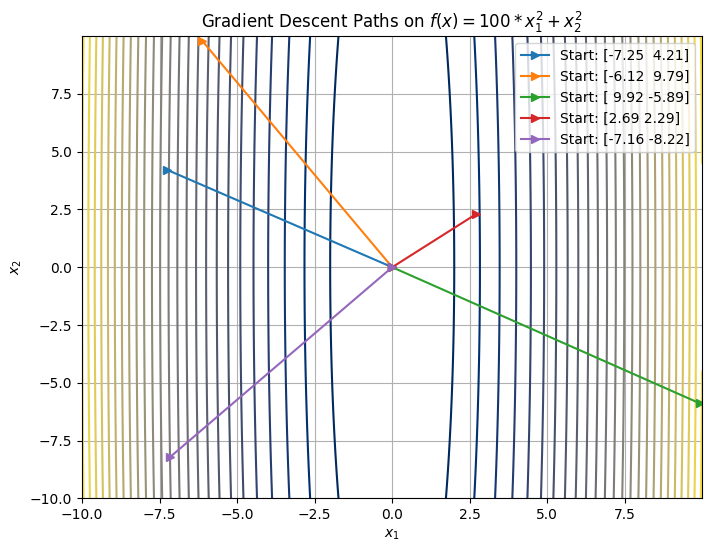

In [282]:
# Paths with Newton

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2), levels=30, cmap='cividis')
plt.title('Gradient Descent Paths on $f(x) = 100*x_1^2 + x_2^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Plot paths for each starting point
for point in range(5):#starting_points:
    point = np.random.uniform(low=-10, high=10, size = (2,))
    path = Newton(1, point, k=k, verbose_last=True)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='>', label=f'Start: {point.round(2)}')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments:**
Now, the algorithm appreciates the changes in both axis and it directly goes to the minimum.

#### 2.1.3) Compare the number of iterations that are needed to get to the minimum. It may also be interesting to plot the path that each of the method follows.

**Answer:**

Before it took many steps, ranging from less than 10 to more than 1000. Now, it is almost immediate, always getting there in the first steps.

The paths were plotted in the previous cells. We can clearly see that without Newton, it first minimizes the value along the x_1 axis, as it has a much bigger difference of values, and then along the x_2 axis, taking many many steps because the difference is very small. In the Newton method, it goes straight to the point.

### 2.2 A function with multiple minima

We are now going to focus on the function studied in Section 1.2

$$
f(x_1, x_2) = x^2_1(4 − 2.1 x^2_1 + \frac{1}{3}x^4_1) + x_1x_2 + x^2_2(−4 + 4x^2_2)
$$

Observe that this function is not convex. You are requested to perform the next experiments

The Hessian is:

$$
Hf(x_1, x_2) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}  
\end{bmatrix}
=
\begin{bmatrix}
10x_1^4-25,2x_1^2+8 & 1 \\
1 & 16x_2^2-8  
\end{bmatrix}
$$

In [283]:
# declaring the function
def f(X1, X2):
  return X1**2 * (4 - 2.1 * X1**2 + (1/3) * X1**4) + X1 * X2 + X2**2 * (-4 + 4 * X2**2)

# declaring its gradient
def grad_f(X1,X2):
  return np.array([2*X1**5 - 8.4*X1**3 + 8*X1 + X2, X1+16*X2**3-8*X2])

# declaring the hessian
def hessian_f(x1, x2):
  return np.array([[10*x1**4 - 25.2*x1**2 + 8, 1], [1, 16*x2**2 - 8]])

1. Recover the experiments you performed in the previous sections. Indeed, take an initial point
$x_0$, “far away” from a minimum (but e.g. within the range $x_1 \in [−2, 2]$ and $x_2 \in [−1, 1]$), and compute the number of iterations that are needed to get to the minimum.

In [286]:
# Newton method
def Newton(alpha_inicial, x0, k, verbose=False, verbose_last=False, abs_cond=1e-3, norm_cond=1e-5):
    x = [x0]
    if verbose: print("x0 = ", x[-1])

    for i in range(1, k+1):
        alpha = alpha_inicial
        fx = f(x[-1][0], x[-1][1])
        d = -np.linalg.inv(hessian_f(x[-1][0], x[-1][1])) @ grad_f(x[-1][0], x[-1][1])
        print(d)
        x_new =  x[-1] + alpha * d
        while(f(x_new[0], x_new[1]) >= fx):
            alpha *= 0.5
            x_new =  x[-1] + alpha * d

        x.append(x_new)
        if verbose: print(f"x{i} = {x[-1]}")

        # Stopping criterion
        if abs(fx - f(x_new[0], x_new[1])) < abs_cond or np.linalg.norm(grad_f(x_new[0], x_new[1])) < norm_cond:
            if verbose or verbose_last: print("Stopping criterion met")
            if verbose_last: print(f"x{i} = {x[-1]}")
            return x

    if verbose_last: print(f"x{i} = {x[-1]}")
    return x

In [287]:
x0_1 = np.random.uniform(low=-2, high=2, size = (1,))
x0_2 = np.random.uniform(low=-1, high=1, size = (1,))
point = np.array([x0_1[0], x0_2[0]])
print(f"Random Starting point: {point}")
path_SGD = np.array(SGD(1, point, 100))
print(f"SGD took {len(path_SGD)-1} steps.")
path_b = np.array(SGD_b(1, point, 1000))
print(f"SGD_b took {len(path_b)-1} steps.")
path_Newton = np.array(Newton(1, point, 100))
print(f"SGD_Newton took {len(path_Newton)-1} steps.")

Random Starting point: [-1.51059636 -0.78693614]
SGD took 100 steps.
SGD_b took 4 steps.
[-0.94493895  2.07370489]
[0.08148792 0.02526766]
[0.02510055 0.01069361]
[0.00222927 0.00296581]
SGD_Newton took 4 steps.


<ipython-input-283-9b9eaf97a4e6>:7: RuntimeWarning: overflow encountered in scalar power
  return np.array([2*X1**5 - 8.4*X1**3 + 8*X1 + X2, X1+16*X2**3-8*X2])
<ipython-input-283-9b9eaf97a4e6>:7: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([2*X1**5 - 8.4*X1**3 + 8*X1 + X2, X1+16*X2**3-8*X2])


In [288]:
print(path_SGD)
# It is not converging, we are not going to plot it

[[-1.51059636e+000 -7.86936137e-001]
 [-1.86238369e+000  2.22536710e+000]
 [ 1.36053477e+000 -1.54438810e+002]
 [ 1.56746349e+002  5.89357849e+007]
 [-1.89268427e+011 -3.27534610e+024]
 [ 4.85759008e+056  5.62200954e+074]
 [-5.40921582e+283 -2.84311690e+225]
 [             nan              inf]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 [             nan              nan]
 

In [289]:
print(path_b)

[[-1.51059636 -0.78693614]
 [-1.68649003  0.71921548]
 [-1.70110399  0.8121996 ]
 [-1.70507618  0.78883616]
 [-1.70286197  0.79895835]]


In [290]:
print(path_Newton)

[[-1.51059636 -0.78693614]
 [-1.7468311  -0.26850991]
 [-1.66534318 -0.24324225]
 [-1.64024263 -0.23254864]
 [-1.639128   -0.23106574]]


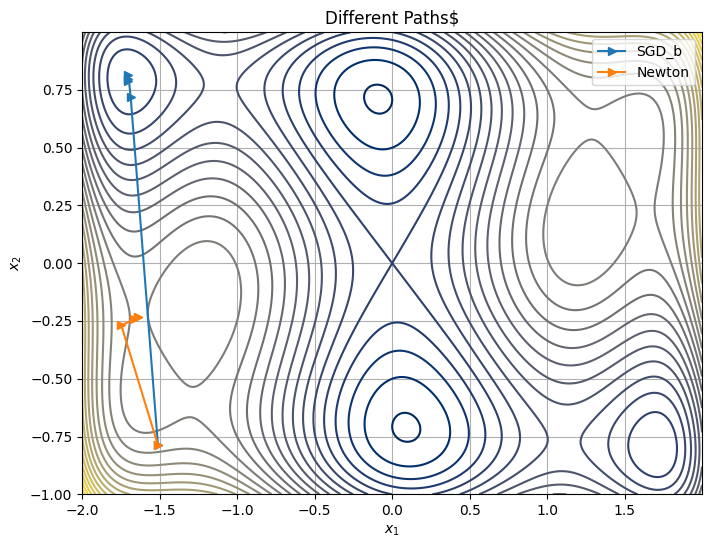

In [291]:
# Plot the results

x1 = np.arange(-2, 2, 0.002)
x2 = np.arange(-1, 1, 0.001)
X1, X2 = np.meshgrid(x1, x2)

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1,X2), levels=30, cmap='cividis')
plt.title('Different Paths$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

#plt.plot(path_SGD[:, 0], path_SGD[:, 1], marker='>', label=f'SGD')
plt.plot(path_b[:, 0], path_b[:, 1], marker='>', label=f'SGD_b')
plt.plot(path_Newton[:, 0], path_Newton[:, 1], marker='>', label=f'Newton')

plt.legend()
plt.grid(True)
plt.show()
plt.close()

**Comments on the plot:**

We plotted the SGD_b and Newton paths. We did not plot the SGD path as it diverged. SGD_b worked fine and soon reached a minimum. Newton had some unexpercted behaviour and did not converge to a minimum. As we will see in the following section, we cannot apply the method as is, as the hessian is not always definite positive.

#### 2.2.2) We are now going to focus on the Newton method. As stated before, the Newton method uses a descent direction which is the solution of
$$ \nabla^2  f (x^k) d^k = −\nabla f(x^k)  (1)$$
The vector $d^k$
is a descent direction only if (and only if) the Hessian is positive definite. If the
Hessian is not positive definite the obtained vector $d^k$ is not necessarily a descent direction.

Thus, another approach has to be devised if the Hessian is not positive definite. There are
several methods that try to tackle the previous problem. For instance, a simple method is
to use the gradient descent in case the Hessian is not positive definite. Another method
is to perform the descent only for those components $(x_1, x_2)^T$
for which the corresponding eigenvalue is positive (recall that the eigenvalue gives us information about the shape of the function: convex or concave).

In this lab we propose to use the gradient descent in case the Hessian at iteration $x^k$
is not positive definite. Thus, the algorithm to implement can be summarized as follows:

(a) Assume we are at iteration k. Compute the Hessian matrix. (This may be done analytically).


(b) If the Hessian is positive definite, use the Newton method to perform the descent. Otherwise, use the gradient descent to perform the descent. In both cases use the backtracking
algorithm to compute a good value for $\alpha^k$.


It is interesting to analyze which of both methods, the combined gradient-Newton or the
classical gradient descent, is used at each iteration k. A simple way to proceed is to plot
the path the minimization algorithm follows: use red dots if the algorithm uses a gradient
descent, and use green dots if the Newton method is used. You should observe that “near”
the minimum the Newton method is mostly used. The function is convex near the minimum
and that allows to approach it in a fast way.

In [292]:
def maybe_Newton(alpha_inicial, x0, k, verbose=False, verbose_last=False, abs_cond=1e-3, norm_cond=1e-5):
    x = [x0]
    methods = []  # To store which method was used

    if verbose: print("x0 = ", x[-1])

    for i in range(1, k+1):
        alpha = alpha_inicial
        fx = f(x[-1][0], x[-1][1])
        hess = hessian_f(x[-1][0], x[-1][1])

        # if all the eigenvalues are positive, apply Newton; otherwise, apply gradient descent
        if np.all(np.linalg.eigvals(hess) > 1e-6):
            d = -np.linalg.inv(hess) @ grad_f(x[-1][0], x[-1][1])
            method = "Newton"
        else:
            d = -grad_f(x[-1][0], x[-1][1])
            method = "Gradient Descent"

        if verbose: print(f"Iteration {i}: using {method}")
        methods.append(method)  # Track the method used

        # Backtracking line search
        x_new = x[-1] + alpha * d
        while f(x_new[0], x_new[1]) >= fx:
            alpha *= 0.5
            x_new = x[-1] + alpha * d

        x.append(x_new)

        # Stopping criterion: check for small changes in function value or gradient norm
        if np.abs(fx - f(x_new[0], x_new[1])) < abs_cond or np.linalg.norm(grad_f(x_new[0], x_new[1])) < norm_cond:
            if verbose or verbose_last: print("Stopping criterion met")
            if verbose_last: print(f"x{i} = {x[-1]}")
            return x, methods  # Return both path and methods for tracking

    if verbose_last: print(f"x{i} = {x[-1]}")
    return x, methods

In [293]:
p, methods = maybe_Newton(1, point, k=k, verbose_last=True, verbose=True)

print(p)

x0 =  [-1.51059636 -0.78693614]
Iteration 1: using Newton
Iteration 2: using Gradient Descent
Iteration 3: using Gradient Descent
Iteration 4: using Gradient Descent
Iteration 5: using Newton
Iteration 6: using Gradient Descent
Stopping criterion met
x6 = [ 0.08881033 -0.71725945]
[array([-1.51059636, -0.78693614]), array([-1.7468311 , -0.26850991]), array([ 0.25173308, -0.36001551]), array([ 0.06149904, -0.6581736 ]), array([ 0.08251571, -0.75380286]), array([ 0.07727341, -0.70661225]), array([ 0.08881033, -0.71725945])]


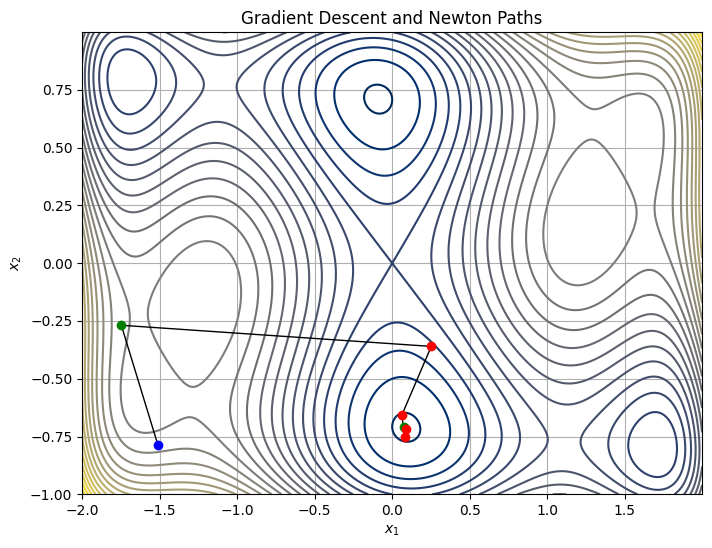

In [294]:
# Run the optimization
path, methods = maybe_Newton(1, point, 100)

# Convert the path into a numpy array for easy indexing
path = np.array(path)

# Plot
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2), levels=30, cmap='cividis')
plt.title('Gradient Descent and Newton Paths')

# Plot lines connecting the points
plt.plot(path[:, 0], path[:, 1], 'k-', lw=1, alpha=1)  # Black line connecting the dots

# Plot points with color based on method used
plt.plot(path[0, 0], path[0, 1], 'bo')  # Starting point
for i, method in enumerate(methods):
    if method == "Newton":
        plt.plot(path[i+1, 0], path[i+1, 1], 'go')  # Green dot for Newton
    else:
        plt.plot(path[i+1, 0], path[i+1, 1], 'ro')  # Red dot for Gradient Descent

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.show()

**Comments on the plot:**

When we are close to the minimum, the hessian is definite positive and the Newton method is used.

#### 2.2.3) Compare the Newton method (item 2 in this list) with the classical gradient descent (item 1 in this list). You may test how many iterations are required to arrive to the minimum and compare the path that each of the method follows to arrive to the minimum.

Observe that in this experiment you perform a “binary” decision: if all the eigenvalues are positive the Newton direction is used, if not, the gradient descent is used. This is a simplification of the techniques that are currently available. Indeed, if only some of the eigenvalues are positive one may
compute a descent direction related to the positive eigenvalues. The descent that is not as good as the (ideal) Newton direction but it is better than the simple gradient descent. The algorithm is called “Truncated Newton Method”. We do not implement it here due to lack of time Just a few words to summarize. You should observe that the Newton method requires, in general, a lesser amount of iterations than the gradient descent to reach the minimum. But the disadvantage of the Newton method is that it requires solving the linear system of equations (1) and thus it requires higher computational effort if you have to deal with large number of variables. In addition, one needs to know if the Hessian matrix is positive definite in order to be sure that the
vector $d^k$ is a descent direction. There are methods that tackle the previous computational issues in a fast way, namely the L-BFGS. In any case, take into account that the Newton method has
great advantages over the gradient descent method. But this does not necessarily mean that the Newton method is always better than gradient descent to minimize your function. In some cases the gradient descent may be good enough for the problem to be solved. This is in fact what happens
with machine learning: the problem to minimize may be so big that even the gradient descent is
not able to efficiently deal with the minimization. In such cases a “simplification” of the gradient descent is used, the so called stochastic gradient descent (which may use the Adam algorithm that try follow a good descent path). We’ll see this algorithm in another practical.


In [310]:
# Initial random point for comparison
x0_1 = np.random.uniform(low=-2, high=2, size = (1,))
x0_2 = np.random.uniform(low=-1, high=1, size = (1,))
point = np.array([x0_1[0], x0_2[0]])

print(f"Starting point: {point}")

# Run gradient descent
path_grad = SGD_b(1, point, 1000, verbose_last=True)
path_grad = np.array(path_grad)
print(f"Gradient Descent took {len(path_grad)-1} steps.")

# Run Newton (or maybe_Newton)
path_newton, methods = maybe_Newton(1, point, 1000, verbose_last=True)
path_newton = np.array(path_newton)
print(f"Newton/Gradient Descent took {len(path_newton)-1} steps.")


Starting point: [-0.66604134 -0.60070445]
Stopping criterion met
x9 = [ 1.70273712 -0.79910815]
Gradient Descent took 9 steps.
Stopping criterion met
x8 = [ 1.69586847 -0.7945385 ]
Newton/Gradient Descent took 8 steps.


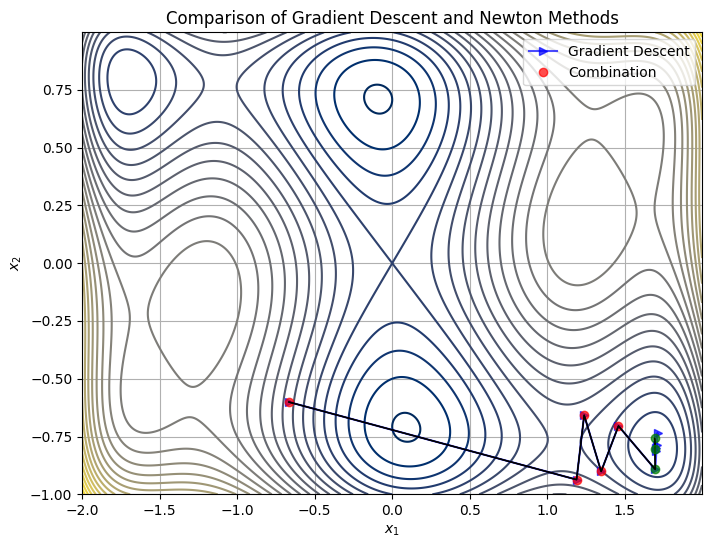

In [311]:
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2), levels=30, cmap='cividis')
plt.title('Comparison of Gradient Descent and Newton Methods')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot gradient descent path (blue)
plt.plot(path_grad[:, 0], path_grad[:, 1], 'b-', marker='>', label="Gradient Descent", alpha=0.7)

# Plot Newton's method path (green for Newton, red for gradient descent steps)
for i, method in enumerate(methods):
    if method == "Newton":
        plt.plot(path_newton[:, 0], path_newton[:, 1], 'k-', lw=1, alpha=0.8)  # Black line connecting the dots
        plt.plot(path_newton[i, 0], path_newton[i, 1], 'go', label="Combination" if i == 0 else "", alpha=0.7)
    else:
        plt.plot(path_newton[i, 0], path_newton[i, 1], 'ro', label="Combination" if i == 0 else "", alpha=0.7)

plt.legend()
plt.grid(True)
plt.show()

**Comments:**

For the given starting point, the combined method did 1 iteration less than the gradient descent method. Once again, the combined method starts with the gradient descent and when its close to the minimum switches to the Newton method.

### 2.3) The Rosenbrock function


Let us consider again the Rosenbrock function, see section 1.3. You should have seen that you
required many iterations of the gradient descent to reach the minimum (if you have been able to
arrive to it). This is due to the fact that during iterations the gradient descent continuously jumps from one side to the other side of the valley without taking into account the shape of the valley. How does Newton perform here? Assume you take $a = 1$ and $b = 100$ for the Rosenbrock function. You are asked to perform the next experiments:

#### 2.3.1 ) Recover the experiments performed in section 1.3, and the initial starting points $x^0$.

In [312]:
# Rosenbrock function
def f(x1, x2, a=1, b=100):
    return (a - x1)**2 + b * (x2 - x1**2)**2

# Gradient of the Rosenbrock function
def grad_f(x1, x2, a=1, b=100):
    return np.array([-2*(a - x1) - 4*b*x1*(x2 - x1**2), 2*b*(x2 - x1**2)])

# Hessian of the Rosenbrock function (for Newton's method)
def hessian_f(x1, x2, a=1, b=100):
    return np.array([[2 - 4*b*x2 + 12*b*x1**2, -4*b*x1], [-4*b*x1, 2*b]])

In [313]:
# Gradient Descent
def gradient_descent(alpha, x, k, a=1, b=100):
    x = [x]
    for i in range(k):
        grad = grad_f(x[-1][0], x[-1][1], a, b)
        x_new = x[-1] - alpha * grad
        x.append(x_new)
    return np.array(x)

# Newton's Method with backtracking
def newton_method(alpha, x, k, a=1, b=100):
    x = [x]
    for i in range(k):
        hess = hessian_f(x[-1][0], x[-1][1], a, b)
        grad = grad_f(x[-1][0], x[-1][1], a, b)
        if np.all(np.linalg.eigvals(hess) > 0):  # If Hessian is positive definite
            d = -np.linalg.inv(hess) @ grad
        else:
            d = -grad  # Gradient Descent fallback
        x_new = x[-1] + alpha * d
        x.append(x_new)
    return np.array(x)


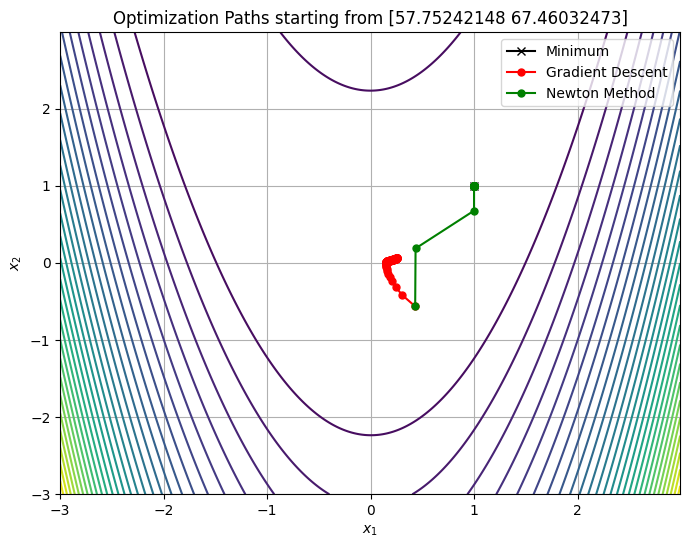

In [315]:
# Create a grid of x1 and x2 values for contour plots
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
X1, X2 = np.meshgrid(x1, x2)

a = 1
b = 100
alpha_gd=0.001

# initial random point
x0_1 = np.random.uniform(low=-2, high=2, size = (1,))
x0_2 = np.random.uniform(low=-1, high=1, size = (1,))
point = np.array([x0_1[0], x0_2[0]])


plt.figure(figsize=(8, 6))

# Contour plot of Rosenbrock function
plt.contour(X1, X2, f(X1, X2, a, b), levels=30, cmap='viridis')
plt.plot(1, 1, color='black', marker='x', label='Minimum')

# Perform Gradient Descent
path_gd = gradient_descent(0.001, point, k=100, a=1, b=100)
plt.plot(path_gd[:, 0], path_gd[:, 1], 'r-o', label='Gradient Descent', markersize=5)

# Perform Newton's Method
path_newton = newton_method(1, point, k=1000, a=1, b=100)

plt.plot(path_newton[:, 0], path_newton[:, 1], 'g-o', label='Newton Method', markersize=5)

plt.title(f'Optimization Paths starting from {x0}')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.show()


** Comments on the plot:**

Newton mathod has been able to reach the global minimum at (1,1) on the other hand gradient descent method was not able, it needs more iterations as it was heading towards the good direction.

#### 2.3.2) Try now to use the combined Newton-gradient descent algorithm and see how many iterations are required to arrive to the minimum. It is interesting to analyze which of both methods (Newton or gradient descent) is used at each iteration. Use two different colors to plot which of both methods is used at each iteration. With the Newton method you should be able to arrive to the minimum.

In [316]:
# Combined Newton and Gradient Descent Method
def maybe_Newton(alpha_inicial, x0, k, verbose=False, abs_cond=1e-3, norm_cond=1e-5):
    x = [x0]
    methods = []

    for i in range(k):
        alpha = alpha_inicial
        fx = f(x[-1][0], x[-1][1])
        hess = hessian_f(x[-1][0], x[-1][1])

        # Check if Hessian is positive definite
        if np.all(np.linalg.eigvals(hess) > 0):
            # Newton method
            d = -np.linalg.inv(hess) @ grad_f(x[-1][0], x[-1][1])
            methods.append("Newton")
        else:
            # Gradient descent
            d = -grad_f(x[-1][0], x[-1][1])
            methods.append("Gradient Descent")

        # Step using backtracking line search
        x_new = x[-1] + alpha * d
        while f(x_new[0], x_new[1]) >= fx:
            alpha *= 0.5
            x_new = x[-1] + alpha * d

        x.append(x_new)

        # Stopping criterion
        if abs(fx - f(x_new[0], x_new[1])) < abs_cond or np.linalg.norm(grad_f(x_new[0], x_new[1])) < norm_cond:
            break

    return np.array(x), methods

In [329]:
point = np.array([0,2])

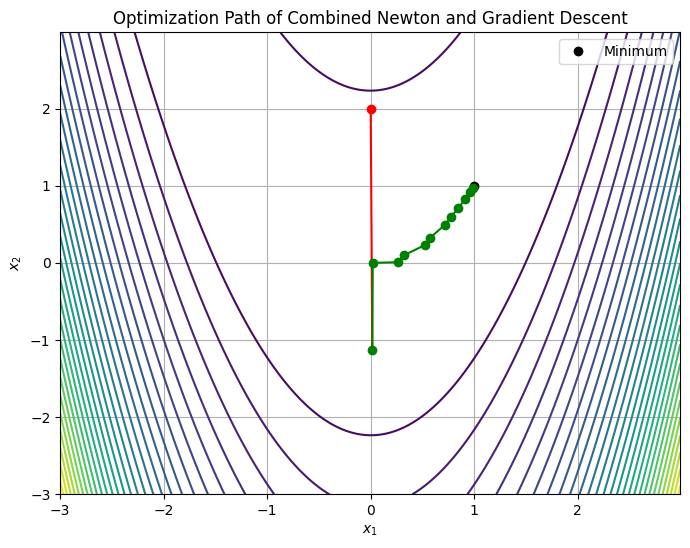

In [331]:
# Run the optimization
path, methods = maybe_Newton(1, point, k=100)

# Plot
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, f(X1, X2, a=a, b=b), levels=30, cmap='viridis')
plt.plot(1, 1, 'ko', label='Minimum')
plt.title('Optimization Path of Combined Newton and Gradient Descent')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot paths with color based on method used
for i in range(len(path) - 1):
    if methods[i] == "Newton":
        plt.plot(path[i:i+2, 0], path[i:i+2, 1], color='green')  # Connecting line for Newton
        plt.plot(path[i, 0], path[i, 1], 'go')  # Green dot for Newton
    else:
        plt.plot(path[i:i+2, 0], path[i:i+2, 1], color='red')  # Connecting line for Gradient Descent
        plt.plot(path[i, 0], path[i, 1], 'ro')  # Red dot for Gradient Descent

plt.legend()
plt.grid(True)
plt.show()

**Comments:**

Starting from a point very far away from the minimum, the first iteration is with the gradient descent method, the rest are done with the newton method which follows the minimum zone until the global minimum is reached.